In [1]:
import pandas as pd
df = pd.read_csv('./dataset.csv')

# Drop duplicates
df = df.drop_duplicates()
#fill NaN values with empty string
df = df.fillna('')
df.head()


,Subject Code,Course Title,Description
0,Business,Cyber Management and Policy Capstone,Protect An Organization's Critical Information...
1,Business,Financial Statement Analysis,Calculate And Interpret A Range Of Accounting ...
2,Political Science,U.S. Government,Demonstrate A Well-Rounded Knowledge Of The Un...
3,Political Science,"Climate Policy, Justice and Society",Describe The History Of International Climate ...
4,Political Science,Intro to Conflict Studies,Be Familiar With The Founding Scholars And His...


In [2]:
#remove punctuation and numbers, lowercase
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# lowercase
df['Description'] = df['Description'].apply(lambda x: x.lower())
# remove punctuation and numbers
df['Description'] = df['Description'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))
df.head(10)

,Subject Code,Course Title,Description
0,Business,Cyber Management and Policy Capstone,protect an organizations critical information ...
1,Business,Financial Statement Analysis,calculate and interpret a range of accounting ...
2,Political Science,U.S. Government,demonstrate a wellrounded knowledge of the uni...
3,Political Science,"Climate Policy, Justice and Society",describe the history of international climate ...
4,Political Science,Intro to Conflict Studies,be familiar with the founding scholars and his...
5,Political Science,American Government,identify the extent of christian influence on ...
6,Political Science,Politics of Western Europe,have good knowledge of the structure and opera...
7,Political Science,Politics & Policy of Public Sector Budgeting,analyze various practical and theoretical infl...
8,Political Science,Analytical Approaches For International Studies,develop greater understanding of competing soc...
9,Political Science,Federal Government,explain the origin and development of constitu...


In [3]:
#nltk.download('stopwords')
#nltk.download('punkt')
learning_outcome_stopwords = stopwords.words('english')
# add custom stopwords for course descriptions
learning_outcome_stopwords.extend(['use', 'using', 'students', 'able', 'skills', 'develop', 'identify', 'understand', 'demonstrate'])
print(learning_outcome_stopwords)
df.head(10)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

,Subject Code,Course Title,Description
0,Business,Cyber Management and Policy Capstone,protect an organizations critical information ...
1,Business,Financial Statement Analysis,calculate and interpret a range of accounting ...
2,Political Science,U.S. Government,demonstrate a wellrounded knowledge of the uni...
3,Political Science,"Climate Policy, Justice and Society",describe the history of international climate ...
4,Political Science,Intro to Conflict Studies,be familiar with the founding scholars and his...
5,Political Science,American Government,identify the extent of christian influence on ...
6,Political Science,Politics of Western Europe,have good knowledge of the structure and opera...
7,Political Science,Politics & Policy of Public Sector Budgeting,analyze various practical and theoretical infl...
8,Political Science,Analytical Approaches For International Studies,develop greater understanding of competing soc...
9,Political Science,Federal Government,explain the origin and development of constitu...


In [4]:

def remove_stopwords(description):
    # Tokenize the description
    tokens = word_tokenize(description)
    # Remove stopwords 
    filtered_tokens = [word for word in tokens if word not in learning_outcome_stopwords]
    # Rejoin the filtered tokens into a string
    filtered_description = ' '.join(filtered_tokens)
    return filtered_description

# Apply the cleaning function to each description
df['Description'] = df['Description'].apply(remove_stopwords)

# remove rows with empty descriptions now that we have removed stopwords
df = df[df['Description'] != '']

# save cleaned data
df.to_csv('./cleaned-dataset.csv', index=False)

In [5]:
# wordcloud
from wordcloud import WordCloud
long_string = ' '.join(df['Description'])
wordcloud = WordCloud(width=2000, height=1400, background_color='white').generate(long_string)
wordcloud.to_file('learning_outcomes_wordcloud.png')


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Latent Dirichlet Allocation (LDA) Model using scikit-learn
data = pd.read_csv('./cleaned-dataset.csv')
# Create a CountVectorizer for LDA
count_vectorizer = CountVectorizer(stop_words=learning_outcome_stopwords, max_df=0.95, min_df=2)
count_data = count_vectorizer.fit_transform(data['Description'])

n_topics = 10
lda = LatentDirichletAllocation(n_components=n_topics, random_state=1000)
lda.fit(count_data)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, count_vectorizer.get_feature_names_out(), no_top_words)


Topic 0:
problems data understanding change research ability evaluate climate international social
Topic 1:
political describe define american government institutions social structure understanding mechanisms
Topic 2:
law speeches percent understanding persuasive structural music proportion informative speech
Topic 3:
chemical student data determine problems describe reactions energy chemistry reaction
Topic 4:
management treatment plans primary functions evaluate problems care algebraic understanding
Topic 5:
communication solve apply critical effectively equations written audience thinking appropriate
Topic 6:
describe analyze knowledge music discuss system apply evaluate explain ability
Topic 7:
care health nursing communication practice healthcare effective patient apply professional
Topic 8:
processes research earth describe data explain geologic physical minerals written
Topic 9:
marketing business economic knowledge explain concepts records apply key understanding


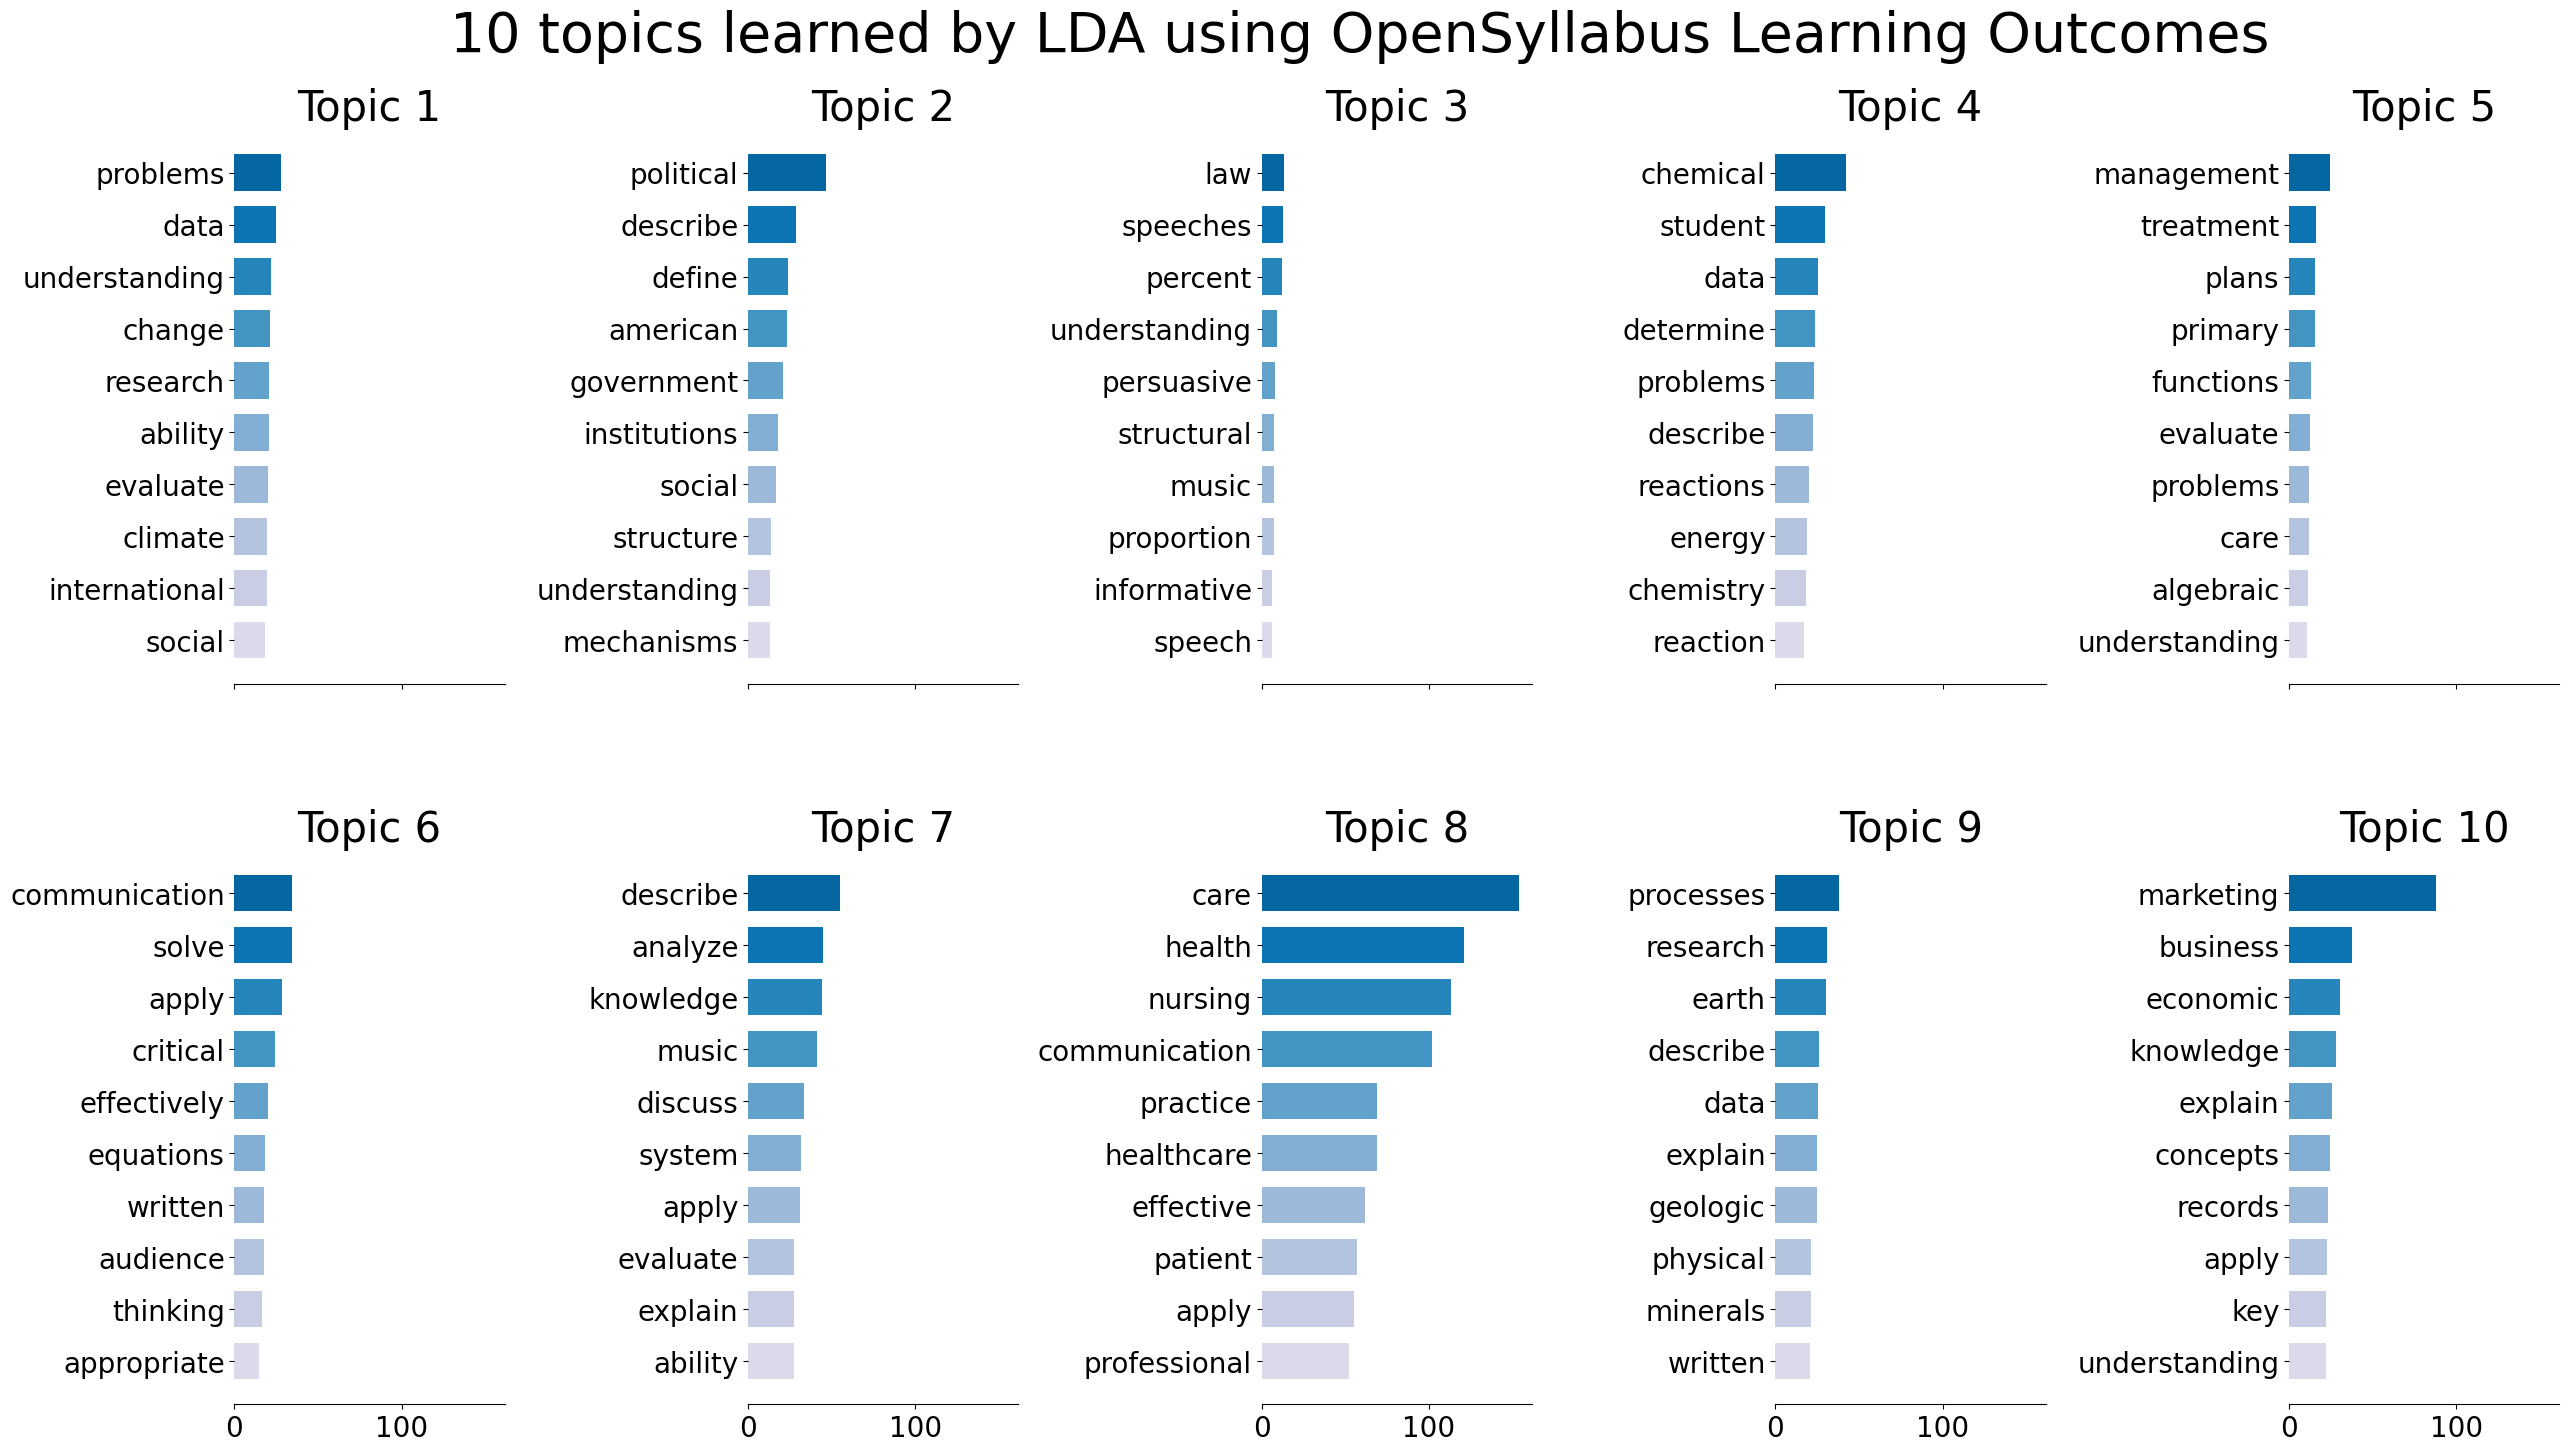

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import random
colormaps = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds', 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu','GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    color = random.choice(colormaps)
    colors = plt.get_cmap(color)(np.linspace(0.2, 0.8, n_top_words))
    # reverse the color map so that the first topic is the darkest
    # colors = colors[::-1]

    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[-n_top_words:]
        top_features = feature_names[top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7, color=colors)  # Specify the colors for each bar
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

plot_top_words(lda, count_vectorizer.get_feature_names_out(), no_top_words, f'{no_top_words} topics learned by LDA using OpenSyllabus Learning Outcomes')